<a href="https://colab.research.google.com/github/deanurulhoeriah/tugas-AI-/blob/main/kelompok15_credit_card_customer_kmeans_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

**Data Understanding**

In [ ]:
data = pd.read_csv('Credit Card Customer Data.csv', sep=";")
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
# melihat info statistikal data
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [ ]:
# mengecek apakah ada nilai null
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [ ]:
# melihat korelasi antar kolom
data.corr()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,1.000000,0.052886,0.677962,0.739329,0.406438,0.033916,-0.684125
Customer Key,0.052886,1.000000,0.068604,-0.010281,-0.000560,0.022506,0.005968
Avg_Credit_Limit,0.677962,0.068604,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.739329,-0.010281,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,0.406438,-0.000560,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.033916,0.022506,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.684125,0.005968,-0.414352,-0.651251,-0.506016,0.127299,1.000000


<Axes: >

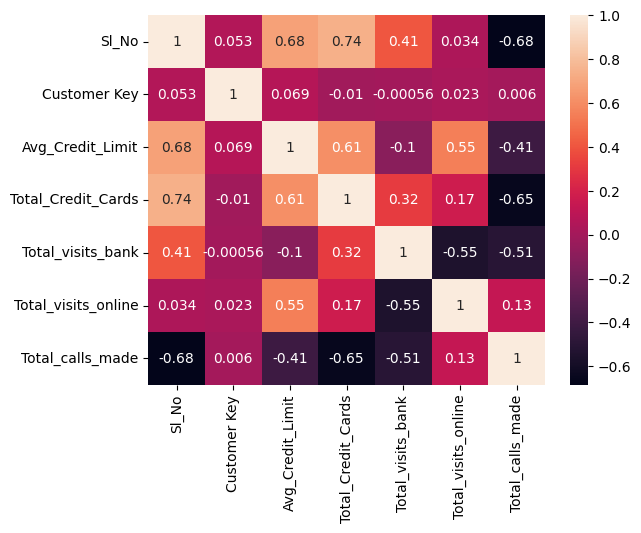

In [ ]:
# visualisasi dari korelasi tiap kolom
sns.heatmap(data.corr(), annot=True)

In [ ]:
#data.drop(['Sl_No', 'Customer Key'], axis=1, inplace=True)

In [ ]:
data.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

**Feature Selection**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif


# Select features using ANOVA
selector = SelectKBest(score_func=f_classif, k=5)
x = selector.fit_transform(data, data.Total_Credit_Cards)

# Print selected features
print("Selected Features:")
print(selector.get_support(indices=True))

Selected Features:
[0 2 3 5 6]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [ ]:
d = pd.DataFrame(data = x, columns =['Sl_No', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_online', 'Total_calls_made'])
d

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_online,Total_calls_made
0,1,100000,2,1,0
1,2,50000,3,10,9
2,3,50000,7,3,4
3,4,30000,5,1,4
4,5,100000,6,12,3
...,...,...,...,...,...
655,656,99000,10,10,0
656,657,84000,10,13,2
657,658,145000,8,9,1
658,659,172000,10,15,0


## Standarisasi

In [ ]:
# normalisasi data agar data tidak memiliki penyimpangan yang besar
sc = StandardScaler()
s = sc.fit_transform(d)
s

array([[-1.72942847,  1.74018685, -1.24922476, -0.54748969, -1.25153737],
       [-1.72417983,  0.41029254, -0.78758515,  2.5205186 ,  1.89185881],
       [-1.71893118,  0.41029254,  1.05897329,  0.13428993,  0.1455276 ],
       ...,
       [ 1.71893118,  2.93709172,  1.5206129 ,  2.17962879, -0.90227113],
       [ 1.72417983,  3.65523464,  2.44389211,  4.22496765, -1.25153737],
       [ 1.72942847,  3.52224521,  1.9822525 ,  3.20229822, -0.55300488]])

**Elbow Method**

Untuk menentukan jumlah K yang optimal.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

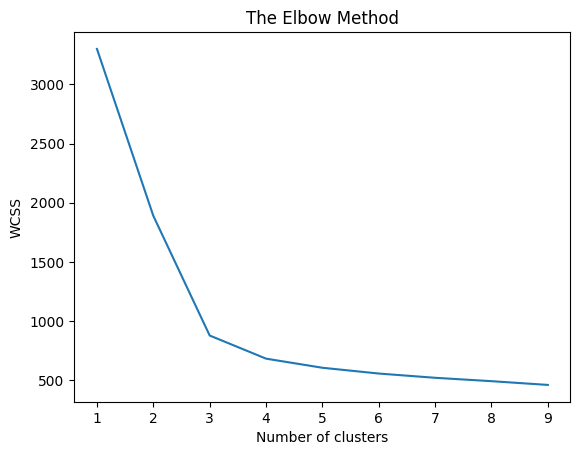

In [ ]:
from sklearn.cluster import KMeans
wcss=[]

# asumsi jumlah K berada di antara 1 sampai 10
for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(s)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Jumlah cluster yang didapatkan dari elbow method adalah 3.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

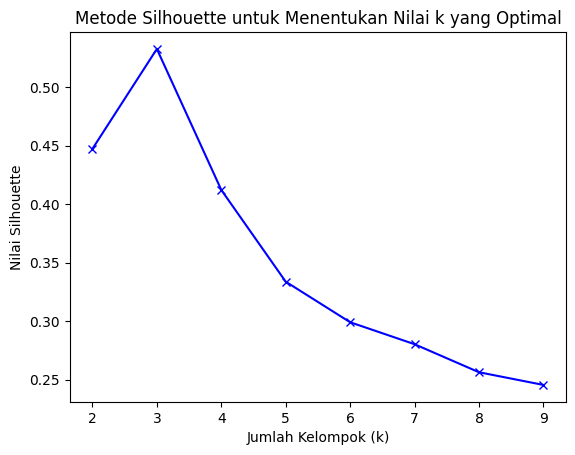

Nilai k yang optimal: 3


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Menentukan rentang nilai k yang akan diuji
k_values = range(2, 10)

# Menyimpan nilai silhouette untuk setiap nilai k
silhouette_scores = []

for k in k_values:
    # Membuat objek KMeans dengan jumlah kelompok yang ditentukan
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(s)

    # Mendapatkan label dari setiap data
    labels = kmeans.labels_

    # Menghitung nilai silhouette
    silhouette_avg = silhouette_score(s, labels)

    # Menambahkan nilai silhouette ke dalam list
    silhouette_scores.append(silhouette_avg)

# Plot hasil nilai silhouette untuk setiap nilai k
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Jumlah Kelompok (k)')
plt.ylabel('Nilai Silhouette')
plt.title('Metode Silhouette untuk Menentukan Nilai k yang Optimal')
plt.show()

# Menentukan nilai k yang optimal berdasarkan nilai silhouette tertinggi
optimal_k = k_values[np.argmax(silhouette_scores)]
print("Nilai k yang optimal:", optimal_k)

**Modelling**

In [ ]:

from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.model_selection import train_test_split



# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test = train_test_split(s, test_size=0.3, random_state=0)

# Melakukan pengelompokan dengan k-means pada data pelatihan
kmeans_model = KMeans(n_clusters=3, random_state=0)
labels_train = kmeans_model.fit_predict(X_train)

# mendapatkan nilai centroid
centroids = kmeans_model.cluster_centers_

# Menghitung nilai Calinski-Harabasz
ch_index = calinski_harabasz_score(X_train, labels_train)
print("Calinski-Harabasz Index:", ch_index)

Calinski-Harabasz Index: 629.6965814713868


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeansmodel = KMeans(n_clusters= 3, random_state=0)
y_kmeans= kmeansmodel.fit_predict(s)
y_kmeans # hasil clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# jumlah anggota masing-masing cluster
pred = y_kmeans
data['Cluster'] = pred
data['Cluster'].value_counts()

0    385
1    225
2     50
Name: Cluster, dtype: int64

In [ ]:
centroids

array([[-1.10067263, -0.59301196, -1.01980386,  0.31403182,  1.15522456],
       [ 0.46969429, -0.02551131,  0.37957914, -0.54620332, -0.57145669],
       [ 1.49865212,  2.90550673,  1.83799013,  2.86140841, -0.83678371]])

In [ ]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
d['cluster'] = cluster
d['cluster'] = cluster

In [ ]:
kmeans_mean_cluster = pd.DataFrame(round(d.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_online,Total_calls_made
cluster,,,,,
1,418.8,33789.6,5.5,1.0,2.0
2,117.0,12257.8,2.4,3.5,6.9
3,611.3,141040.0,8.7,10.9,1.1


**Visualization**

Explained variance ratio (first two components): [0.58952624 0.25926092 0.06573805 0.05844601 0.02702879]


<Figure size 640x480 with 0 Axes>

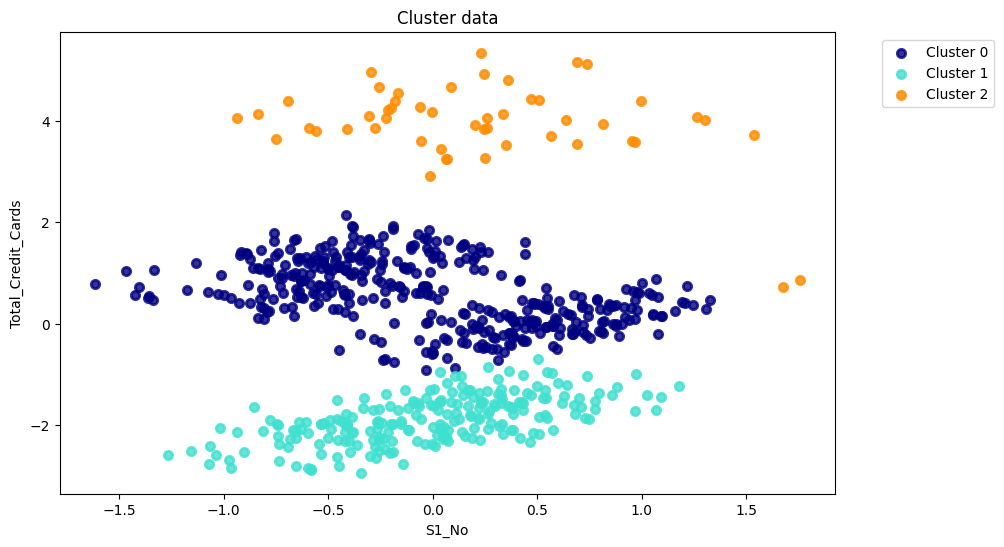

In [ ]:
# RUNNING PCA TO VISUALIZE DATA
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = s
y_num = y_kmeans

target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pca = PCA(n_components=5, random_state = 453)
X_r = pca.fit(X).transform(X)


# PRECENTAGE OF VARIANCE EXPLAINED FOR EACH COMPONENTS
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# PLOTTING DATA POINTS
plt.figure()
plt.figure(figsize=(10,6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y_num == i, 2], X_r[y_num == i, 0], color=color, alpha=.8, lw=lw,label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
plt.title('Cluster data')
plt.xlabel('S1_No')
plt.ylabel('Total_Credit_Cards')
plt.show()

Explained variance ratio (first two components): [0.58952624 0.25926092 0.06573805 0.05844601 0.02702879]


<Figure size 640x480 with 0 Axes>

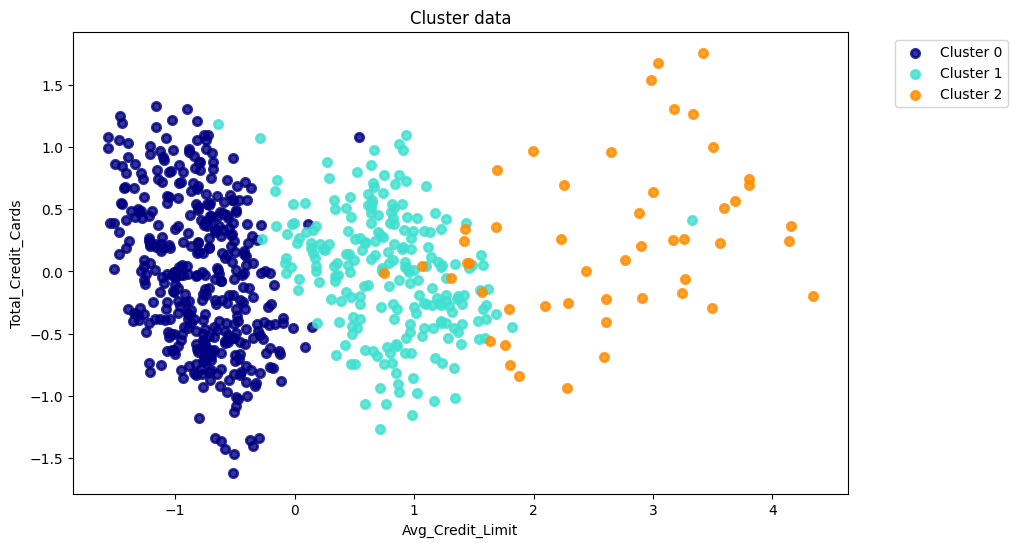

In [ ]:
target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pca = PCA(n_components=5, random_state = 453)
X_r = pca.fit(X).transform(X)


# PRECENTAGE OF VARIANCE EXPLAINED FOR EACH COMPONENTS
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# PLOTTING DATA POINTS
plt.figure()
plt.figure(figsize=(10,6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y_num == i, 1], X_r[y_num == i, 2], color=color, alpha=.8, lw=lw,label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
plt.title('Cluster data')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.show()

Explained variance ratio (first two components): [0.58952624 0.25926092 0.06573805 0.05844601 0.02702879]


<Figure size 640x480 with 0 Axes>

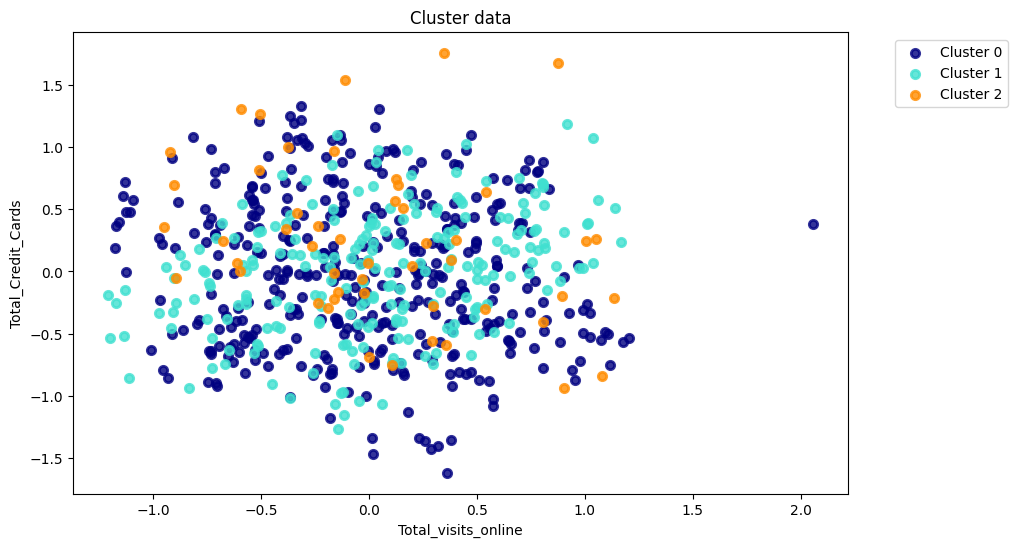

In [ ]:
target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pca = PCA(n_components=5, random_state = 453)
X_r = pca.fit(X).transform(X)


# PRECENTAGE OF VARIANCE EXPLAINED FOR EACH COMPONENTS
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# PLOTTING DATA POINTS
plt.figure()
plt.figure(figsize=(10,6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y_num == i, 3], X_r[y_num == i, 2], color=color, alpha=.8, lw=lw,label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
plt.title('Cluster data')
plt.xlabel('Total_visits_online')
plt.ylabel('Total_Credit_Cards')
plt.show()

Explained variance ratio (first two components): [0.58952624 0.25926092 0.06573805 0.05844601 0.02702879]


<Figure size 640x480 with 0 Axes>

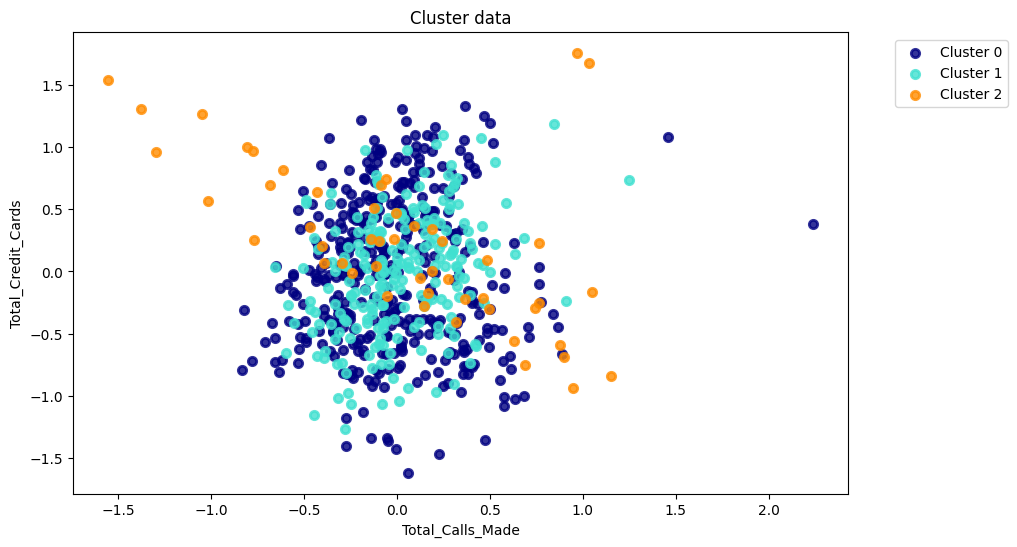

In [ ]:
target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pca = PCA(n_components=5, random_state = 453)
X_r = pca.fit(X).transform(X)


# PRECENTAGE OF VARIANCE EXPLAINED FOR EACH COMPONENTS
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# PLOTTING DATA POINTS
plt.figure()
plt.figure(figsize=(10,6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y_num == i, 4], X_r[y_num == i, 2], color=color, alpha=.8, lw=lw,label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
plt.title('Cluster data')
plt.xlabel('Total_Calls_Made')
plt.ylabel('Total_Credit_Cards')
plt.show()

Explained variance ratio (first two components): [0.58952624 0.25926092 0.06573805 0.05844601 0.02702879]


<Figure size 640x480 with 0 Axes>

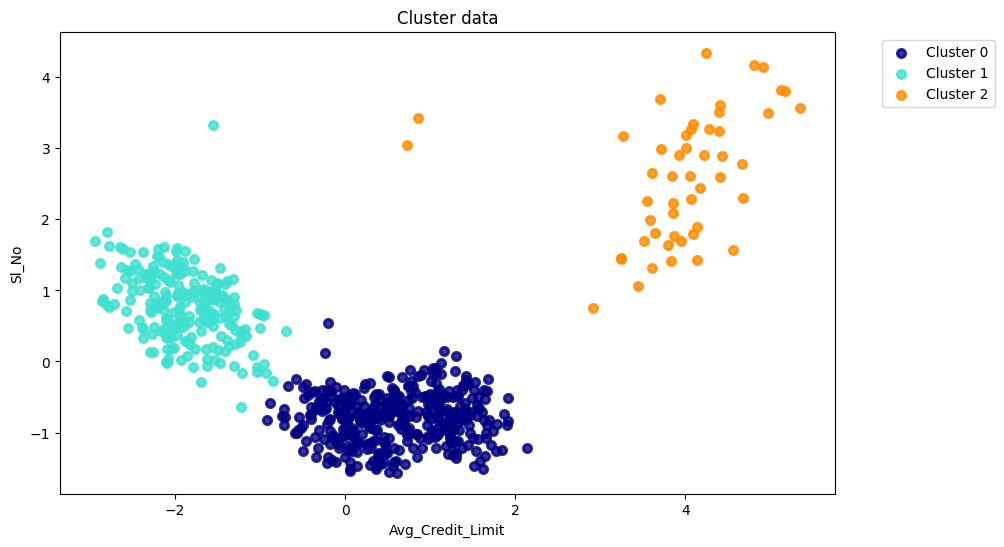

In [ ]:
target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pca = PCA(n_components=5, random_state = 453)
X_r = pca.fit(X).transform(X)


# PRECENTAGE OF VARIANCE EXPLAINED FOR EACH COMPONENTS
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# PLOTTING DATA POINTS
plt.figure()
plt.figure(figsize=(10,6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
plt.title('Cluster data')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Sl_No')
plt.show()

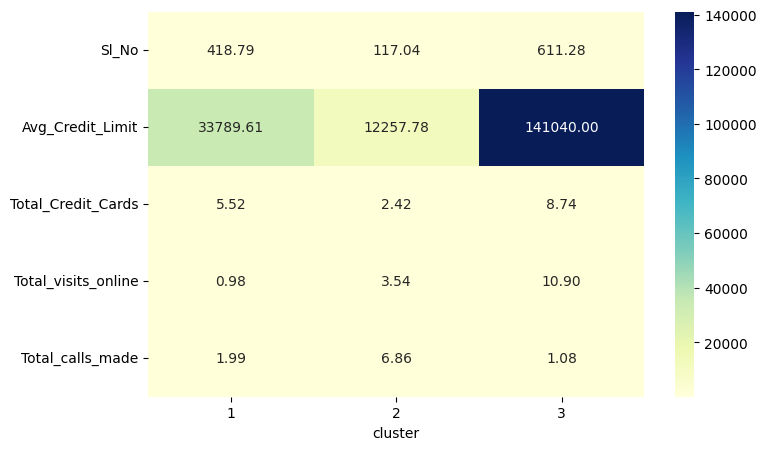

In [ ]:
import seaborn as sns

d['cluster'] = cluster
clustered = d.groupby('cluster').mean()
plt.figure(figsize=(8,5))
sns.heatmap(clustered.T, cmap='YlGnBu', annot = True, fmt=".2f")
plt.show()